<h1 align="center">Predicting Diabetes in Pima Indian Women</h1> 

![Pima Indian Diabetes Project](diabetes.jpg)

# Introduction

The objective of this project is to predict whether or not a patient has diabetes using the popular public dataset regarding Pima Indian Women. All of the women are of Pima Indian heritage and at least 21 years old.

# The Data

The dataset consists of 9 diagnostic predictor variables and a binary target variable "diabetes".  The features include the number of pregnancies each woman has had, glucose concentration, diastolic blood pressure, triceps skinfold thickness, insulin level, body mass index (BMI), a diabetes pedigree function (which relates the familial diabetes history of the subject), age, and another skinfold measurement. There are 768 records with 268 women who have diabetes and 500 who do not.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

In [5]:
master_dataframe = pd.read_csv("pima_diabetes.csv")
master_dataframe.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


### Explore the data

In [5]:
master_dataframe.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


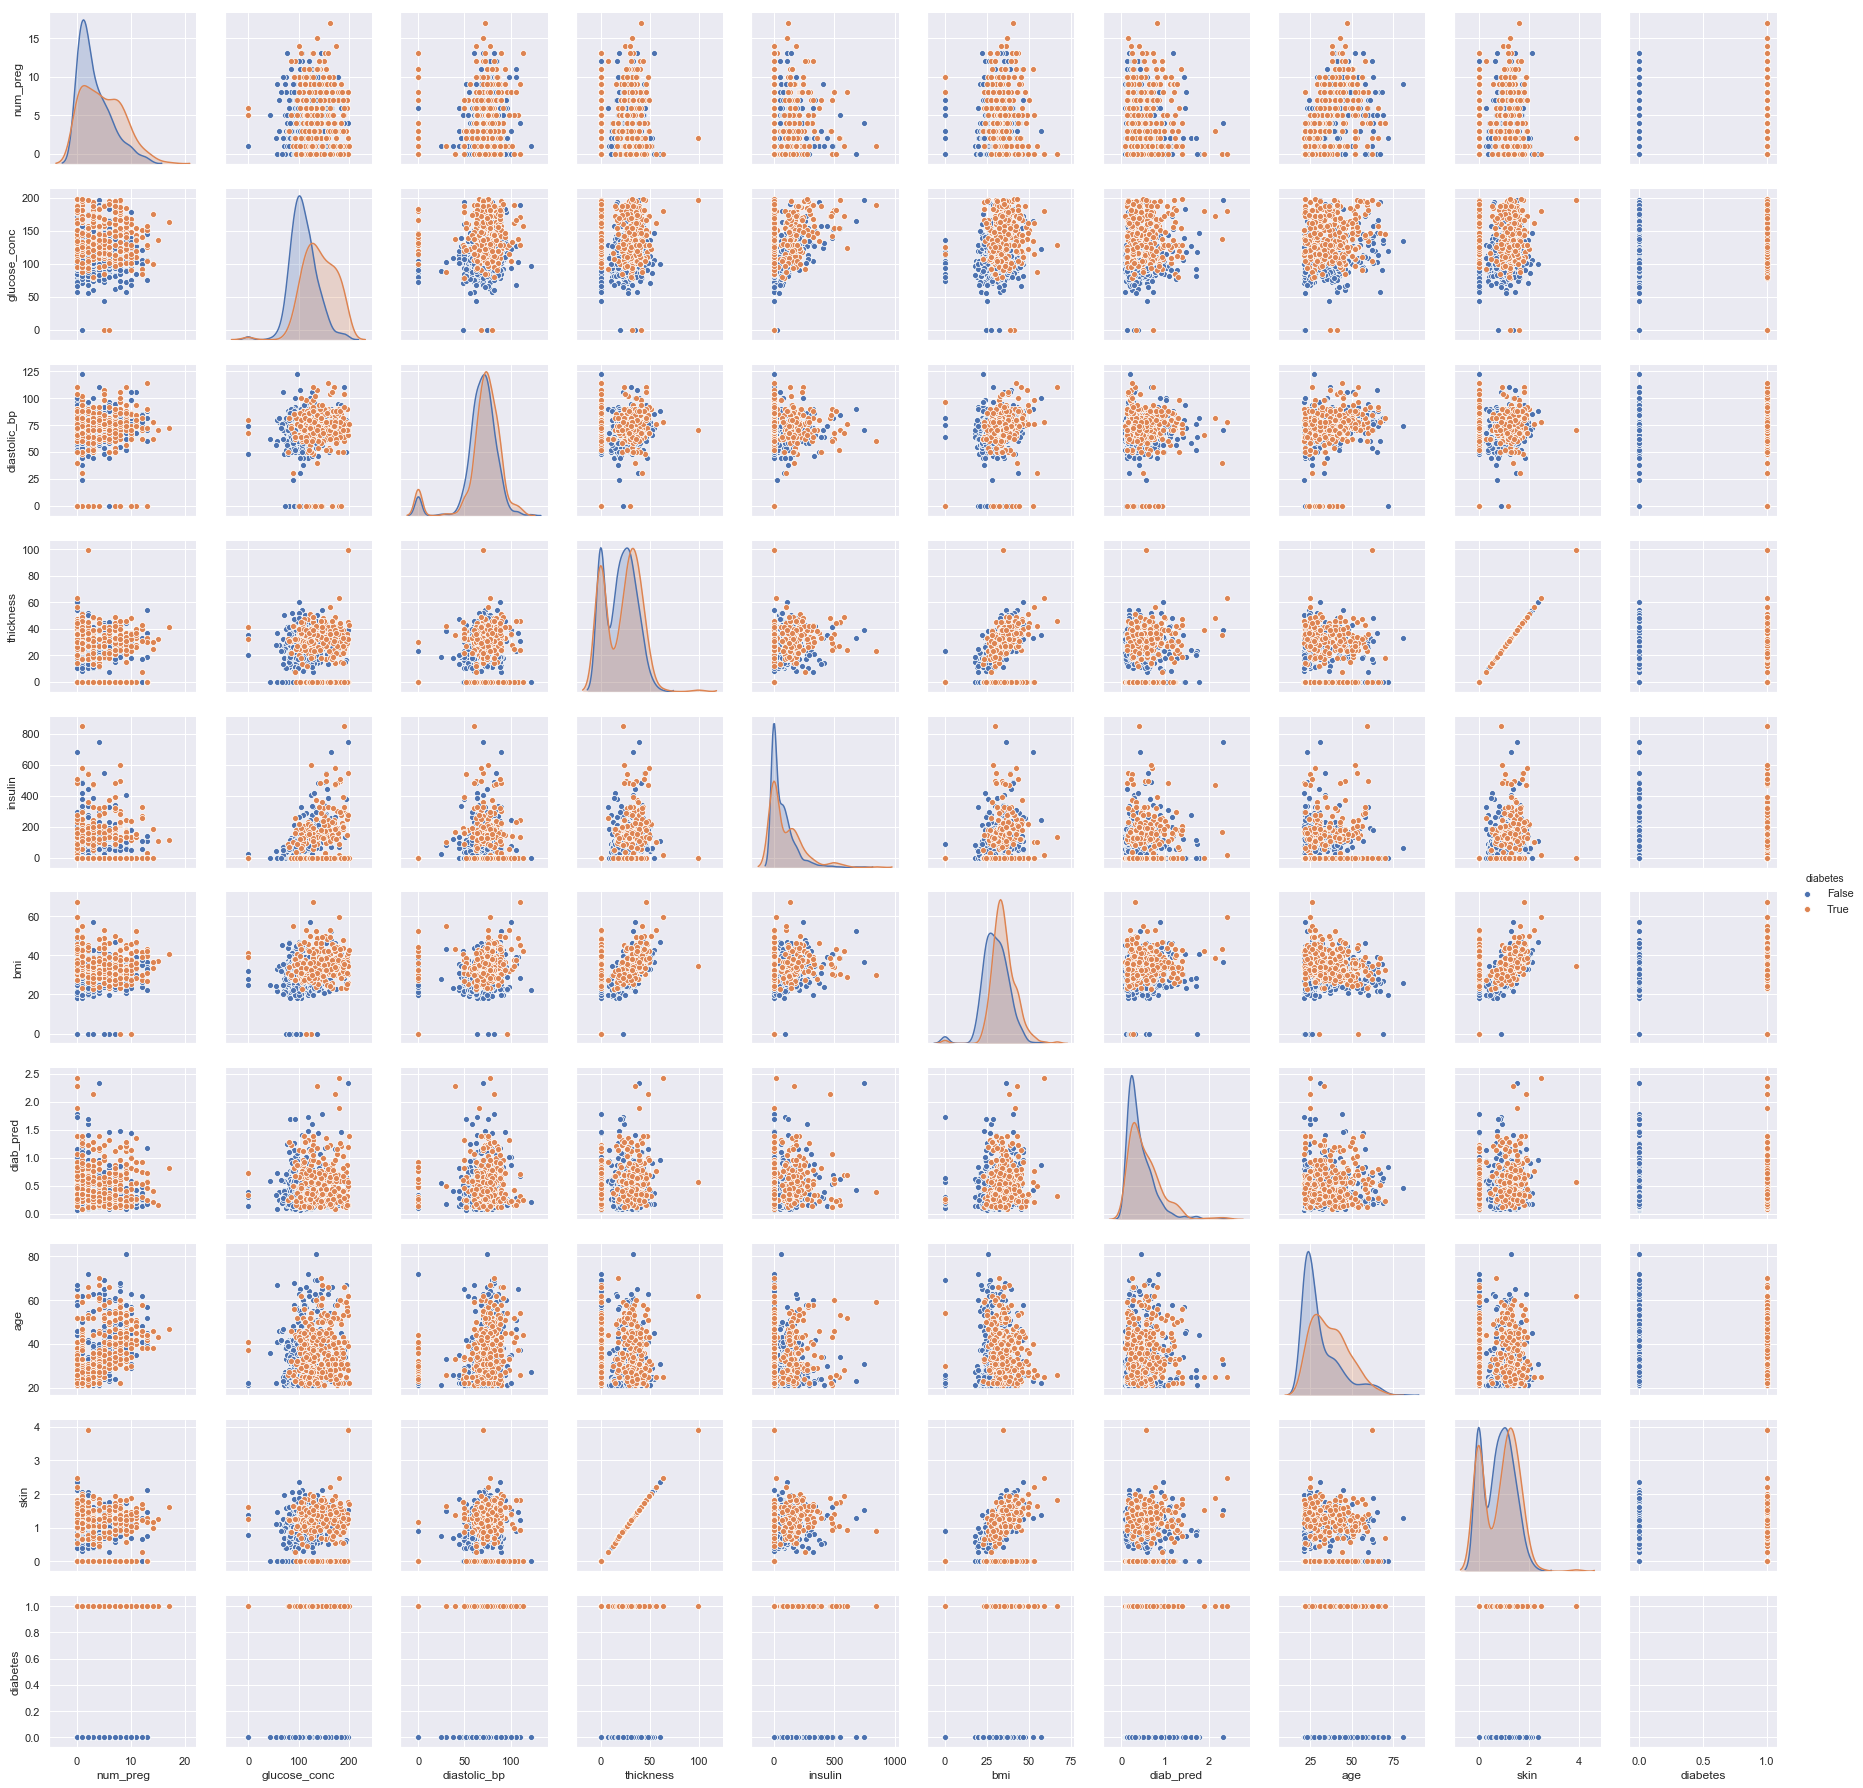

In [13]:
pair_plot = sns.pairplot(master_dataframe, hue='diabetes')

After visually inspecting the data to note any significant patterns or correlations, it is clear that "thickenss" and "skin" are highly correlated and appear to be duplicate measures so I dropped "skin".

In [6]:
# drop returns a copy
df = master_dataframe.drop(['skin'], axis=1) 

Although the data was mostly clean, I noted that several features were encoded with a "0" where there should have been missing values so I replaced those "missing values" with null values (NaN) to better reflect the collected data. I also converted the target "diabetes" variable from the categorical True/False to a binary 1/0.

### Clean and Transform the Data

In [ ]:
# Handle Missing Data

# Impute missing values
# **********  only transform to np.nan if you are going to impute, scikit-learn will give an error if nans are present
mask = df[['glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred']] == 0
df[mask] = np.nan

 
# OR


# Drop rows that contain NANs
df.dropna(axis=0, how='any')    # returns a new DataFrame dropping the rows containing 'any' nans

I imputed the missing data as follows...

OR

I dropped the rows with missing values...

In [7]:
# Transform features
df['diabetes'] = df['diabetes'].map({False:0, True: 1})

### Do one-hot encoding as necessary

In [ ]:
# For example:
    # one_hot_df = pd.get_dummies(df, columns=["name_of_column_to_encode"])

### Archive the cleaned and transforned DataFrame (if desired)

In [ ]:
# cleaned_transformed_df.to_csv("new_filename.csv")

### Visualize the data

Next, I visually explored the data...

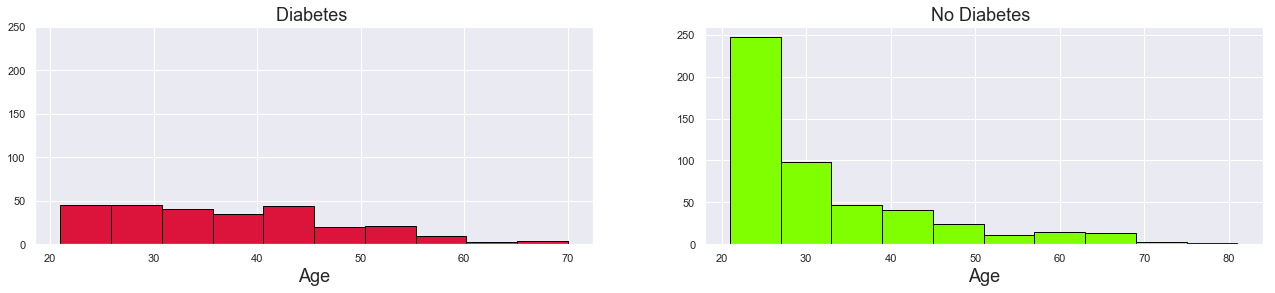

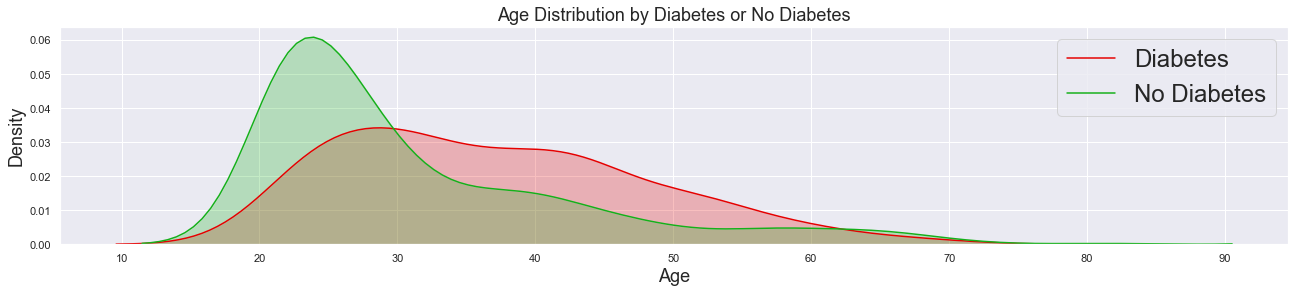

In [8]:
# Histogram
fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(df.loc[master_dataframe['diabetes'] == True, "age"], color = 'crimson', edgecolor='black')
ax[0].set_title('Diabetes ', fontsize = 18) 
ax[0].set_xlabel('Age', fontsize = 18)

ax[0].set_ylim(0,250)
ax[1].hist(df.loc[master_dataframe['diabetes'] == False, "age"], color = 'chartreuse', edgecolor='black')
ax[1].set_title('No Diabetes ', fontsize = 18)
ax[1].set_xlabel('Age', fontsize = 18)


# Density Plot
fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(df.loc[master_dataframe['diabetes'] == True, "age"], shade=True, color=sns.xkcd_rgb["red"], label="Diabetes")
ax = sns.kdeplot(df.loc[master_dataframe['diabetes'] == False, "age"], shade=True, color=sns.xkcd_rgb["green"], label="No Diabetes")
ax.set_title('Age Distribution by Diabetes or No Diabetes', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('Age', fontsize = 18)
plt.legend(fontsize=24)
plt.show()

Age appears to be related to having diabetes and thus will perhaps be a good predictor...

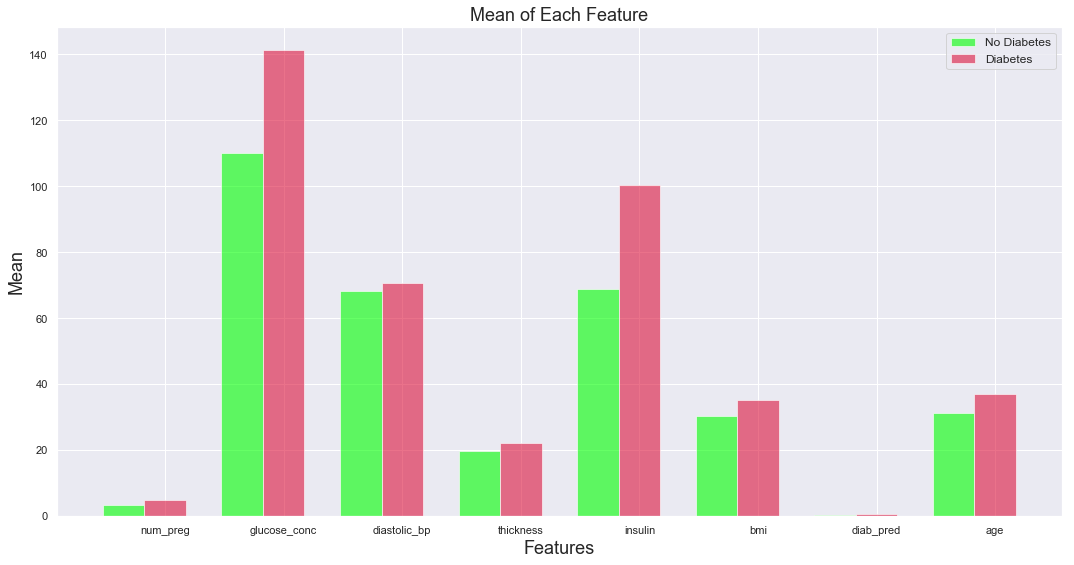

In [9]:
diabetes = df.loc[df['diabetes'] == 1, 'num_preg': 'age'].values
no_diabetes = df.loc[df['diabetes'] == 0, 'num_preg':'age'].values
diabetes_means = np.mean(diabetes, axis=0)
no_diabetes_means = np.mean(no_diabetes, axis=0)

features = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age']
num_features = len(features)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
index = np.arange(num_features)
bar_width = 0.35
opacity = 0.6

rects1 = ax.bar(index, no_diabetes_means, bar_width,
                 alpha=opacity,
                 color='lime',
                 label='No Diabetes')

rects2 = ax.bar(index + bar_width, diabetes_means, bar_width,
                 alpha=opacity,
                 color='crimson',
                 label='Diabetes')

ax.set_xlabel('Features', fontsize=18)
ax.set_ylabel("Mean", fontsize=18)
ax.set_title('Mean of Each Feature', fontsize=18)
#set_tick_labels(ax)
plt.setp(ax, xticks=[i+bar_width for i in index],xticklabels=features)
ax.legend(fontsize=12)
plt.show()

(NOTE: the missing values input as 0 were calculated in these means. The imputed values or dataframe with dropped rows may look very different.)

Diabetics appear to have higher values on every feature. Number of pregnancies is confounded by age - the older you are the more chance that you've had to have more children...  The greatest differences appear to be between glucose concentrations and insulin levels.

Discuss whatever you found with data exploration...

### Place the features and target variable in X and y, respectively

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

I am now ready to start doing some data modeling. I first split the data into training and test sets. I then standardized the data.

### Split and Standardize the Data

In [8]:
# split dataset into test/train  using All features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

# standardize features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# The Machine Learning Models

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = .1)

# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=.1)

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=0)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

### Feature Selection and Feature Engineering

**Random Forest Classifier** can identify the importance of each feature

In [ ]:
rf.fit(X_train, y_train)
feature_importance = rf.feature_importances_

In [ ]:
# feature_importance array needs to be reshaped; it is a vector of shape (8,), it needs to be shaped (1,8)
best_features = pd.DataFrame(feature_importance.reshape(1,-1), columns=df.columns[:-1], index = ["importance"])
best_features

Describe your feature selection or feature engineering...

### Cross Validation (for model selection)

In [13]:
from sklearn.model_selection import cross_val_score

classifiers = [log_reg, knn, svm, rf, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

In [14]:
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                         index=["LR", "KNN", "SVM", "Forest", "Neural Network"])
models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.709091,0.709091,0.836364,0.777778,0.830189,0.811321,0.716981,0.754717,0.773585,0.735849,0.765496
KNN,0.709091,0.709091,0.781818,0.648148,0.773585,0.830189,0.660377,0.641509,0.830189,0.698113,0.728211
SVM,0.709091,0.745455,0.836364,0.777778,0.811321,0.792453,0.735849,0.773585,0.792453,0.754717,0.772906
Forest,0.709091,0.727273,0.836364,0.759259,0.773585,0.811321,0.698113,0.754717,0.773585,0.716981,0.756029
Neural Network,0.745455,0.781818,0.800000,0.740741,0.735849,0.811321,0.641509,0.754717,0.792453,0.754717,0.755858


Discuss what the above values mean...

### Box Plot (for model selection)

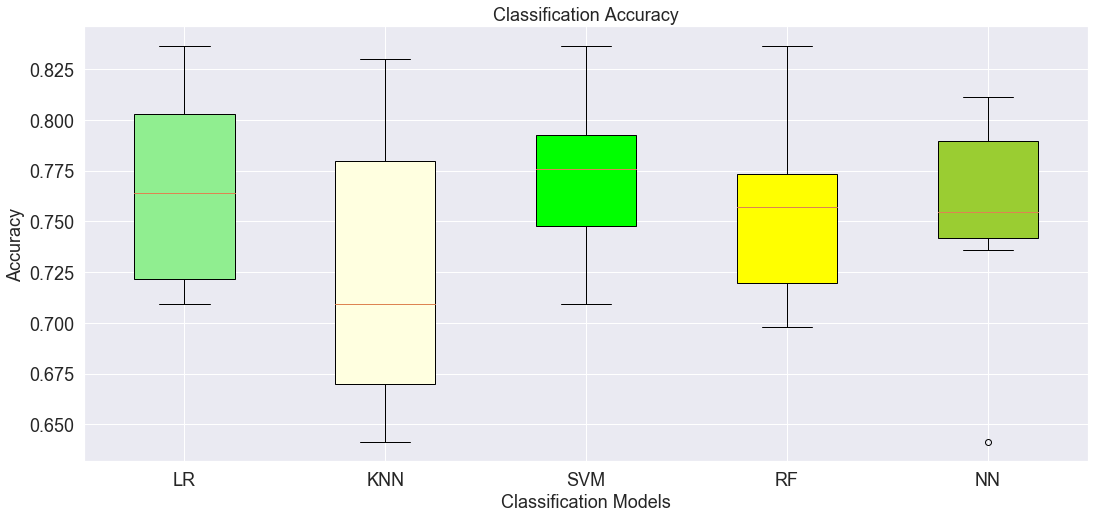

In [15]:
        
# BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)

axes.set_title('Classification Accuracy', fontsize = 18)


# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'KNN', 'SVM', 'RF', 'NN'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)


Interpret the box plot...

### Compare the accuracy of the Training set versus the Test set using different models

In [17]:
log_reg = LogisticRegression(C = .1)
log_reg.fit(X_train_std, y_train)
train_score = log_reg.score(X_train_std, y_train)
test_score = log_reg.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.770949720670391 
Test score: 0.7835497835497836


In [26]:
svm = SVC(kernel='linear', C=.1)
svm.fit(X_train, y_train)
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.776536312849162 
Test score: 0.7792207792207793


In [22]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 1.0 
Test score: 0.7922077922077922


### Nested Cross-Validation: Grid Search (for hyperparameter tuning) within cross-validation

In [29]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param_range = [0.0001, 0.001, .005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
classifiers = [{"clf":LogisticRegression(random_state=0), "param_grid":[{'C': param_range}]}, 
               {"clf":SVC(random_state=0), "param_grid":[{'C': param_range, 'gamma': param_range, 'kernel': ['linear','rbf']}]}, 
               {"clf":RandomForestClassifier(random_state=0), "param_grid":[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
                                                                             'max_features': [None, 'auto'],
                                                                            'n_estimators': [10, 100, 1000]}]}
              ]

# 10x3 Nested Cross Validation  (algorithm comparison)
model_scores = []
for classifier in classifiers:
    # Inner Cross Validation, searches for the best parameters
    gs = GridSearchCV(estimator=classifier["clf"], param_grid=classifier["param_grid"], scoring='accuracy', cv=3)
    # Outer Cross Validation, evaluates the model
    model_scores.append(cross_val_score(gs, X_train_std, y_train, scoring='accuracy', cv=10))

models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                         index=["LR", "SVM", "Forest"])
models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.709091,0.709091,0.836364,0.740741,0.830189,0.811321,0.716981,0.754717,0.773585,0.735849,0.761793
SVM,0.690909,0.781818,0.836364,0.759259,0.773585,0.830189,0.754717,0.773585,0.754717,0.716981,0.767212
Forest,0.654545,0.690909,0.745455,0.759259,0.811321,0.849057,0.679245,0.735849,0.811321,0.735849,0.747281


### Grid Search

In [30]:
# Grid Search (Logistic Regression) comparing Test with Training set accuracy

gs = GridSearchCV(estimator=log_reg, param_grid=[{'C': param_range}], scoring='accuracy', cv=3)
gs.fit(X_train, y_train)
train_score = gs.score(X_train, y_train)
test_score = gs.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.7746741154562383 
Test score: 0.7835497835497836


In [ ]:
# Grid Search (Support Vector Machine) comparing Test with Training set accuracy

gs = GridSearchCV(estimator=svm, param_grid=[{'C': param_range, 'gamma': param_range, 'kernel': ['linear','rbf']}], scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
train_score = gs.score(X_train, y_train)
test_score = gs.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

In [ ]:
# Grid Search (Random Forest) comparing Test with Training set accuracy

gs = GridSearchCV(estimator=rf, param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
                                                                             'max_features': [None, 'auto'],
                                                                            'n_estimators': [10, 100, 1000]}], scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
train_score = gs.score(X_train, y_train)
test_score = gs.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

### Confusion Matrix (for model performance metrics)

              precision    recall  f1-score   support

 No Diabetes       0.80      0.90      0.85       146
    Diabetes       0.78      0.61      0.68        85

   micro avg       0.79      0.79      0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



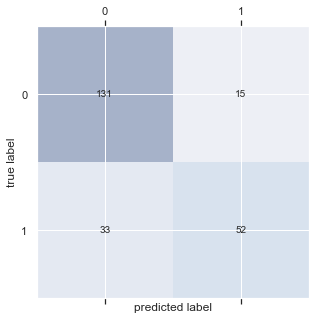

In [10]:
#Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))

In [11]:
# to see the balance of the target variable
    # you can comment on your choice of performance measure given the balance of the target variable
print(df.groupby('diabetes').size())

diabetes
False    500
True     268
dtype: int64


Interpret and comment on the confusion matrix and the various scores (accuracy, precision and recall).

# Discussion

If there is anything that you did that was noteworthy or if there was anything that you might have done diferently etc. , discus it here.

# Conclusion

Summarize the problem, what you were able to discover from the data, and talk about your model and its ability to accurately classify the data (i.e., accuracy, precision, and/or recall).